<img src="https://i.imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px;"/>


# DSI-SG-42

## Project Two - Regression Challenge (HDB Price)

---

# 3. Data Visualizations

This notebook serves to create an extended exploratory data analysis to get a better understanding of the distributions and relationships of the features.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# setting displays
%matplotlib inline
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# handle warnings
warnings.filterwarnings("ignore", category=UserWarning)


# import train data

hdb = pd.read_csv('../datasets/hdb_no_dummy.csv', low_memory=False, index_col=0)
print(hdb.head())

       id  flat_type  floor_area_sqm  flat_model  resale_price  tranc_year  tranc_month  hdb_age  max_floor_lvl  multistorey_carpark planning_area  mall_within_2km  hawker_within_2km  mrt_nearest_distance     mrt_name  bus_interchange                           pri_sch_name  nearby_top_sch  prop_one_room  prop_two_room  prop_three_room  prop_four_room  prop_five_room  prop_exec  prop_multigen  prop_studio_apt   region  North South Line  North East line  East West Line  Circle Line  Down Town Line  Thomson East Coast Line  floor_density  floor_category
0   88471     4 ROOM            90.0     Model A      680000.0        2016            5       15             25                    0       Kallang                7                 13            330.083069      Kallang                0               geylang methodist school               0            0.0            0.0              0.0        0.676056        0.323944   0.000000            0.0              0.0  Central                 0     

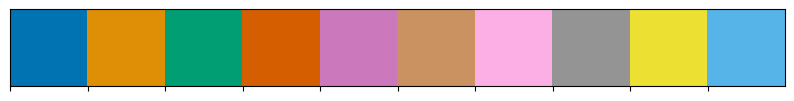

In [2]:
# import color palette

colors = sns.color_palette("colorblind") 
sns.palplot(colors) # inspect colors



# Assign colors
custom_palette = {'Central': colors[4],
                  'East': colors[3],
                  'West': colors[2],
                  'North': colors[9],
                  'North East': colors[1]}

## Barplots

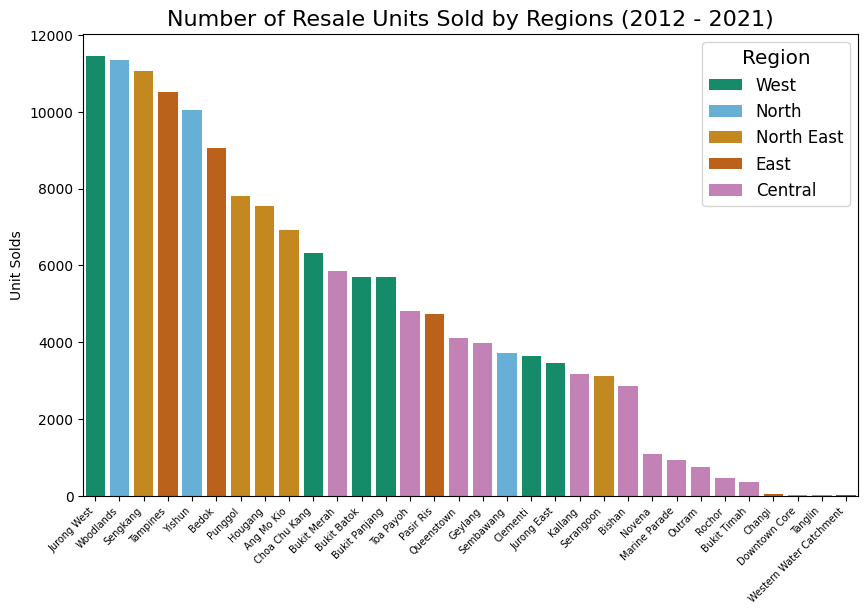

In [3]:
# plot the number of resale units sold over the different planning areas
num_sold_units_planning_area = hdb.groupby(['planning_area', 'region'])['id'].count().sort_values(ascending=False)
plt.figure(figsize=(10,6))

sns.barplot(x=num_sold_units_planning_area.index.get_level_values('planning_area'), 
            y=num_sold_units_planning_area.values, 
            hue=num_sold_units_planning_area.index.get_level_values('region'), 
            palette=custom_palette)

plt.ylabel('Unit Solds')
plt.xlabel('')
plt.xticks(rotation=45, fontsize = 7, ha='right')
plt.title('Number of Resale Units Sold by Regions (2012 - 2021)', fontsize = 16)
plt.legend(title='Region',  fontsize = 'large', title_fontsize = 'x-large')
plt.show()


This distribution is an extension of the earlier plot in notebook 1. The regions are colorcoded and shows clearly shows that most regions outside of Central region are transacted more.

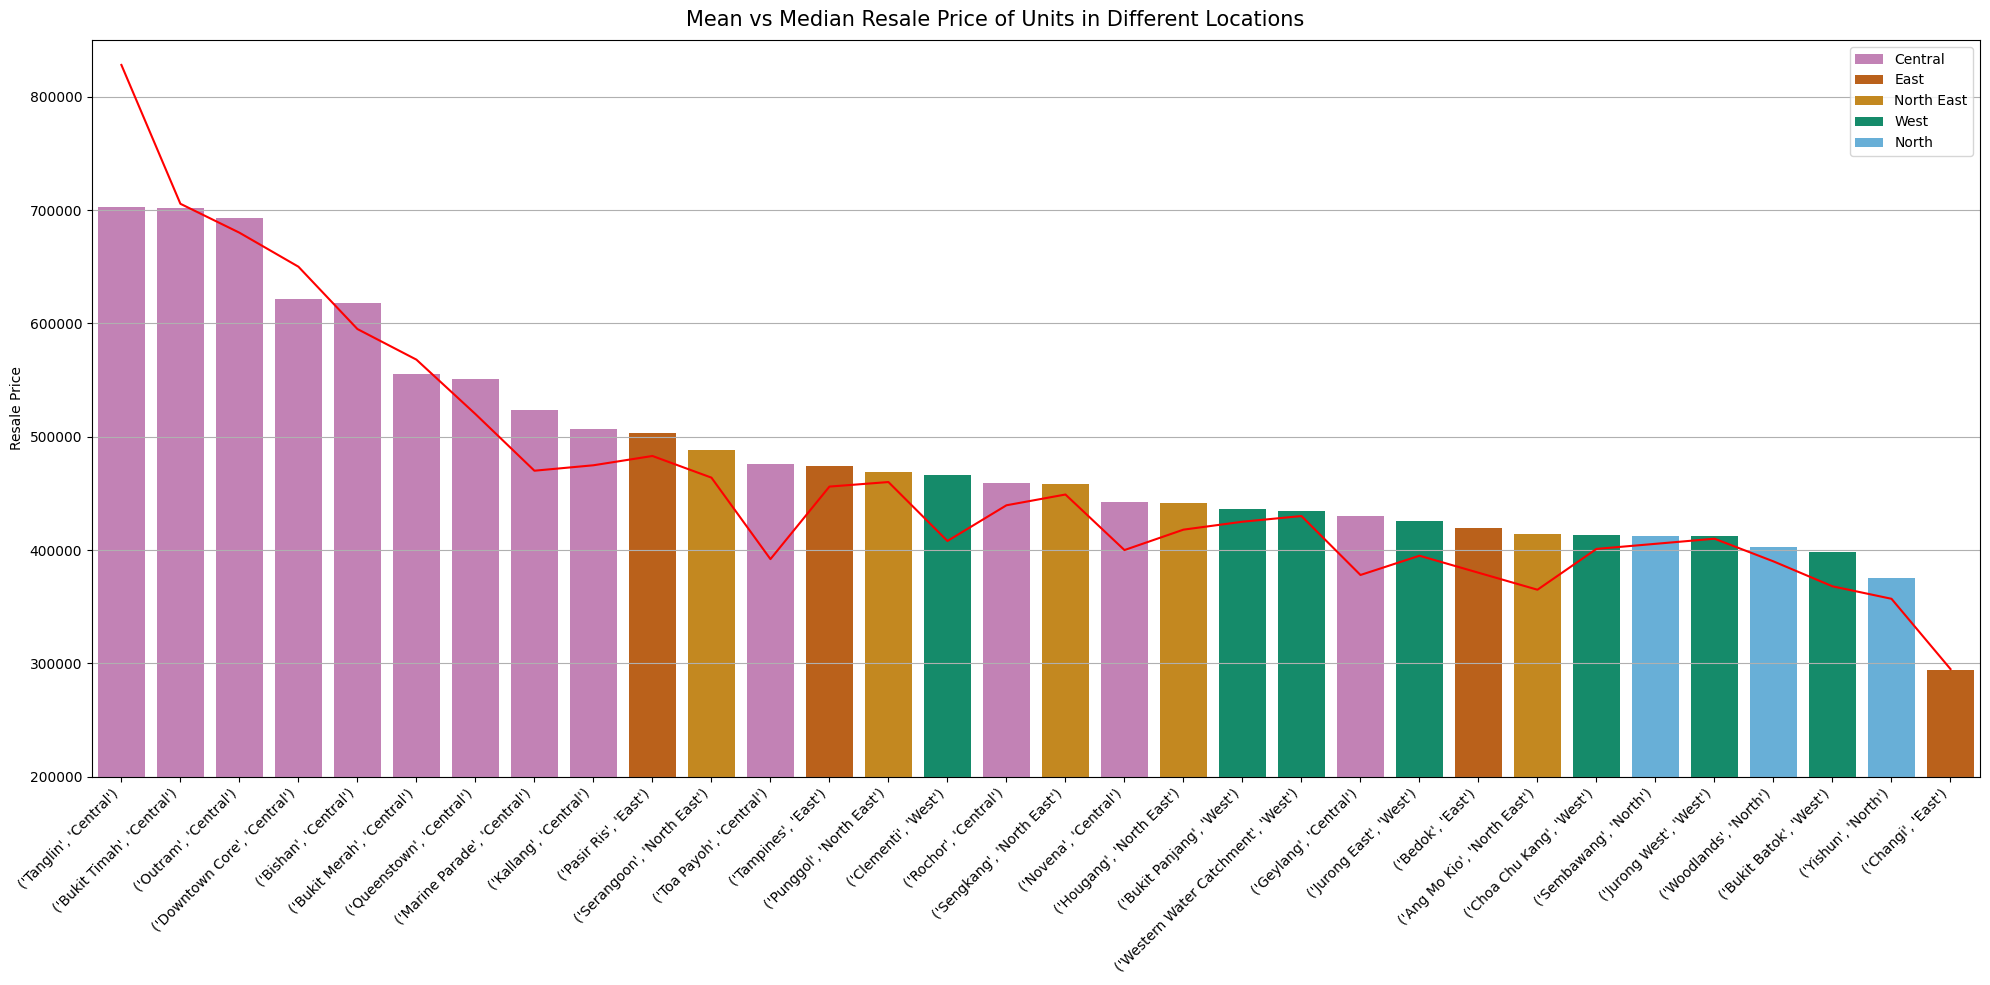

In [4]:
# plot distribution of mean resale prices on different planning area based on URA's Master Plan

fig, ax1 = plt.subplots(figsize=(20,10))

mean_price_area = hdb.groupby(['planning_area', 'region'])['resale_price'].mean().sort_values(ascending=False)
median_resale_area = hdb.groupby(['planning_area', 'region'])['resale_price'].median().sort_values(ascending=False)


# plotting of barplot
ax1 = sns.barplot(x = mean_price_area.index.get_level_values('planning_area'), 
                  y = mean_price_area.values, 
                  hue = mean_price_area.index.get_level_values('region'),
                  palette=custom_palette,
                  ax = ax1)

ax1.set_xlim()
ax1.set_ylim(200000, 850000)
ax1.set_ylabel('Resale Price')

#ax1.set_xlabel('Planning Area')
#ax1.legend(loc='upper left')
ax1.set_xticklabels(mean_price_area.index, rotation = 45, ha='right')



median_resale_df = pd.DataFrame({'planning_area': median_resale_area.index.get_level_values('planning_area'), 'median_resale_price': median_resale_area.values})

sns.lineplot(data = median_resale_df, x = 'planning_area', y = 'median_resale_price', color = 'red', ax = ax1)


# adding graph information
plt.suptitle('Mean vs Median Resale Price of Units in Different Locations', fontsize = 15)
plt.xlabel('')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

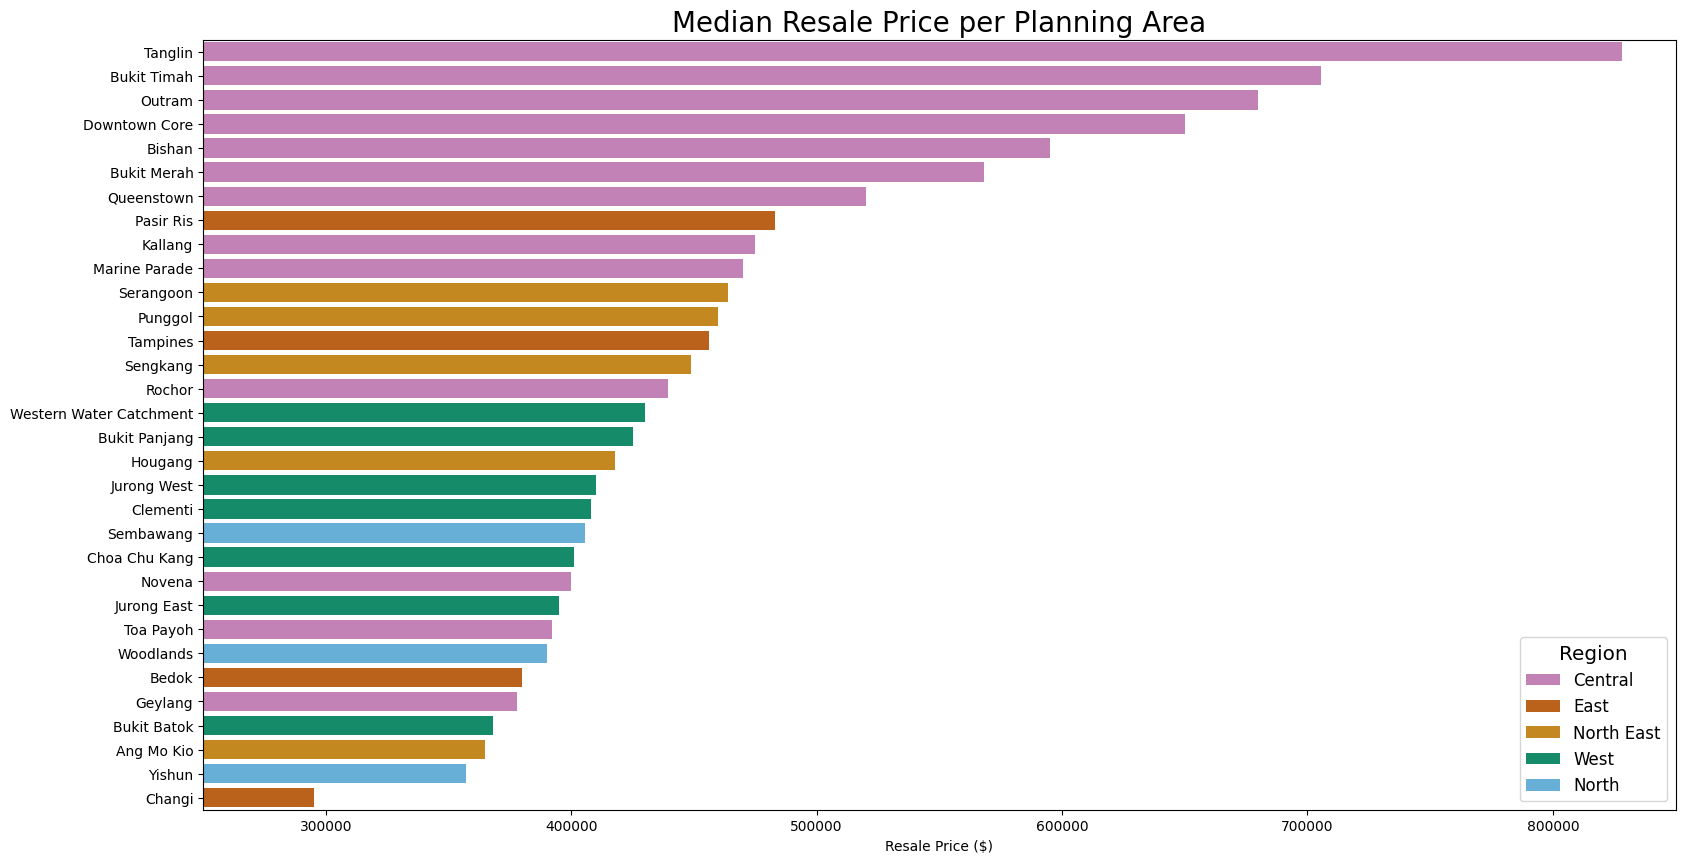

In [5]:
# Median resale price for each region

# plot the number of resale units sold over the different planning areas
median_price_per_region = hdb.groupby(['planning_area', 'region'])['resale_price'].median().sort_values(ascending=False)

#print(median_price_per_region) # debug
plt.figure(figsize=(19,10))

sns.barplot(y=median_price_per_region.index.get_level_values('planning_area'), 
            x=median_price_per_region.values, 
            hue=median_price_per_region
        .index.get_level_values('region'), 
            palette=custom_palette)

plt.ylabel('')
plt.xlim(250000,850000)
plt.xlabel('Resale Price ($)')

plt.title('Median Resale Price per Planning Area', fontsize = 20)
plt.legend(title='Region', loc = 4, fontsize = 'large', title_fontsize = 'x-large')
plt.show()

This plot is supportive that Central region has a substantial higher resale price, with the highest median price of $828000.0 and the lowest at Changi at $295000.0. However, this is a summary median transacted price and does not take into account the different flat types (i.e. executive, 4-room flat, etc...)

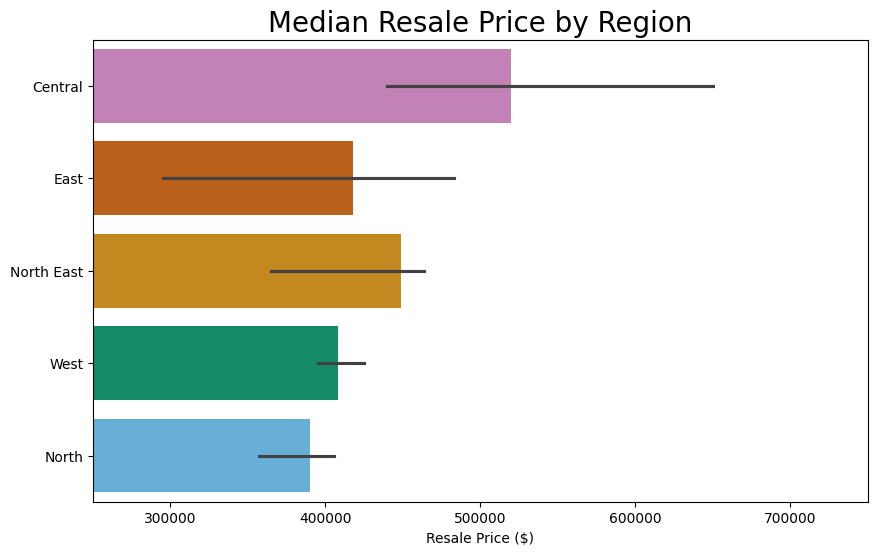

In [6]:
# Median resale price for each region

# plot the number of resale units sold over the different planning areas
median_price_per_region = hdb.groupby(['planning_area', 'region'])['resale_price'].median().sort_values(ascending=False)

#print(median_price_per_region) # debug
plt.figure(figsize=(10,6))

sns.barplot(y=median_price_per_region.index.get_level_values('region'), 
            x=median_price_per_region.values, 
            hue=median_price_per_region.index.get_level_values('region'), 
            palette=custom_palette,
            estimator=np.median)

plt.ylabel('')
plt.xlabel('Resale Price ($)')
plt.xlim(250000,750000)

plt.title('Median Resale Price by Region', fontsize = 20)
plt.show()

Overall, Central region has the greatest transacted price while the lowest transacted price is in the North region. 

In [7]:
print(median_price_per_region )

planning_area            region    
Tanglin                  Central       828000.0
Bukit Timah              Central       705500.0
Outram                   Central       680000.0
Downtown Core            Central       650000.0
Bishan                   Central       595000.0
Bukit Merah              Central       568000.0
Queenstown               Central       520000.0
Pasir Ris                East          483000.0
Kallang                  Central       474800.0
Marine Parade            Central       470000.0
Serangoon                North East    463888.0
Punggol                  North East    460000.0
Tampines                 East          456000.0
Sengkang                 North East    449000.0
Rochor                   Central       439500.0
Western Water Catchment  West          430000.0
Bukit Panjang            West          425000.0
Hougang                  North East    418000.0
Jurong West              West          410000.0
Clementi                 West          408000.0
Semb

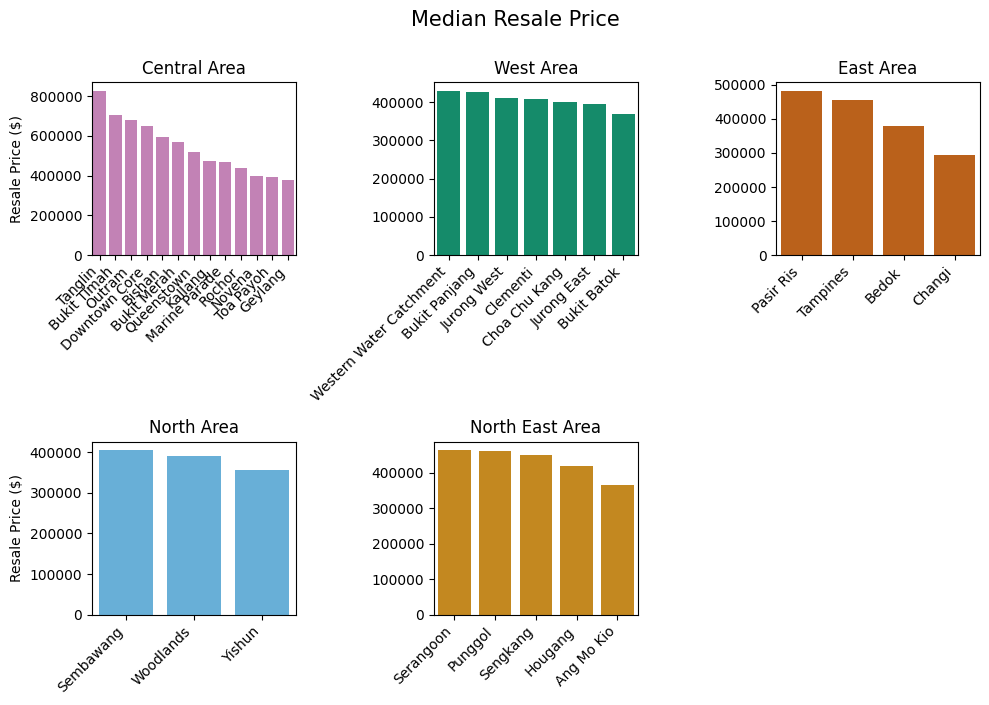

In [8]:
#### Filter by region

## Central Region
central_region = hdb[hdb['region'] == 'Central'] 
sorted_central= central_region.groupby('planning_area')['resale_price'].median().sort_values(ascending=False)
sorted_central = pd.DataFrame(sorted_central).reset_index()

## West Region
west_region = hdb[hdb['region'] == 'West']
sorted_west= west_region.groupby('planning_area')['resale_price'].median().sort_values(ascending=False)
sorted_west = pd.DataFrame(sorted_west).reset_index()

## East Region
east_region = hdb[hdb['region'] == 'East']
sorted_east= east_region.groupby('planning_area')['resale_price'].median().sort_values(ascending=False)
sorted_east = pd.DataFrame(sorted_east).reset_index()

## North Region
north_region = hdb[hdb['region'] == 'North']
sorted_north= north_region.groupby('planning_area')['resale_price'].median().sort_values(ascending=False)
sorted_north = pd.DataFrame(sorted_north).reset_index()

## North-East Region
northeast_region = hdb[hdb['region'] == 'North East']
sorted_northeast= northeast_region.groupby('planning_area')['resale_price'].median().sort_values(ascending=False)
sorted_northeast = pd.DataFrame(sorted_northeast).reset_index()



# Creating subplots
fig, axes = plt.subplots(2,3, figsize=(10,7))

# plotting central region
ax = sns.barplot(data = sorted_central, x = 'planning_area', y = 'resale_price',  color=colors[4], ax = axes[0][0])
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_ylabel('Resale Price ($)')
ax.set_title('Central Area')

# plotting west region
ax = sns.barplot(data = sorted_west, x = 'planning_area', y = 'resale_price',  color=colors[2], ax = axes[0][1])
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_ylabel('')
ax.set_title('West Area')

# plotting east region
ax = sns.barplot(data = sorted_east, x = 'planning_area', y = 'resale_price',  color=colors[3], ax = axes[0][2])
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_ylabel('')
ax.set_title('East Area')

# plotting north region
ax = sns.barplot(data = sorted_north, x = 'planning_area', y = 'resale_price',  color=colors[9], ax = axes[1][0])
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_ylabel('Resale Price ($)')
ax.set_title('North Area')

# plotting north east region
ax = sns.barplot(data = sorted_northeast, x = 'planning_area', y = 'resale_price',  color=colors[1], ax = axes[1][1])
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_ylabel('')
ax.set_title('North East Area')

# delete the unused plot
fig.delaxes(axes[-1][-1])

# set additional parameters for the plot
plt.suptitle('Median Resale Price', fontsize = 15, y = 1.0, x = 0.52)
plt.tight_layout()
plt.show()


Median resale prices are relatively similar within regions with the exception of Central and East Area. 

Transactions in Western Water Catchment are not available currently as the area is mostly reserved for farms, cemetary, air bases and military usage.

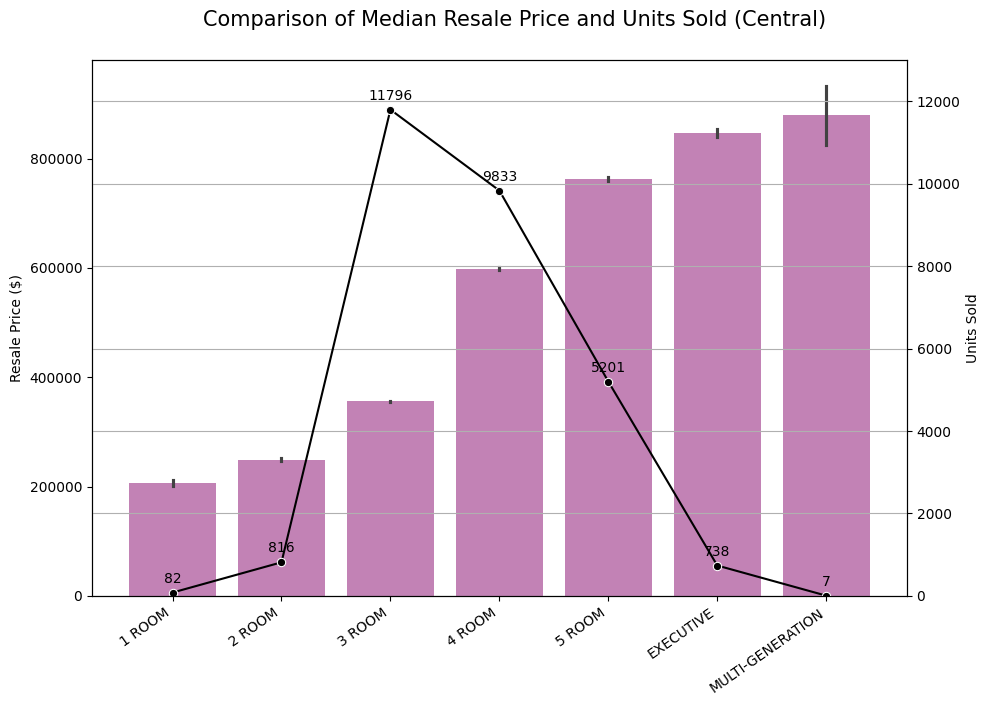

In [9]:
#### Filter by region

## Central Region
central_region = hdb[hdb['region'] == 'Central'] 
sorted_central_price= central_region.groupby(['flat_type', 'id'])['resale_price'].median().sort_values(ascending=False)
sorted_central_flat= central_region.groupby('flat_type')['id'].count().sort_values(ascending=False)
sorted_central_price = pd.DataFrame(sorted_central_price).reset_index()
sorted_central_flat = pd.DataFrame(sorted_central_flat).reset_index()


ordered_flat = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
# Creating subplots
fig, ax1 = plt.subplots(figsize=(10,7))

# plotting central region
ax1 = sns.barplot(data = sorted_central_price, x = 'flat_type', y = 'resale_price',  order = ordered_flat, color=colors[4])
ax1.set_xlabel('')
ax1.set_ylabel('Resale Price ($)')
ax1.set_xticklabels(rotation = 35, ha='right', labels = ordered_flat)


ax2 = ax1.twinx()

ax2 = sns.lineplot(data = sorted_central_flat, x = 'flat_type', y = 'id',  color='black', marker='o')
ax2.set_ylim(0, 13000)
ax2.set_ylabel('Units Sold')


# Annotating the points on the line plot with the count of flats
for x, y in zip(sorted_central_flat['flat_type'], sorted_central_flat['id']):
    ax2.annotate(f'{y}', (x, y), xytext=(0, 5), textcoords='offset points', color='black', ha='center', va='bottom')

# set additional parameters for the plot
plt.suptitle('Comparison of Median Resale Price and Units Sold (Central)', fontsize = 15, y = 1.0, x = 0.52)

plt.grid()
plt.tight_layout()
plt.show()


The comparison shows that the most popular flat type is the 3-room flat in Central region with 11796 units with a median price of $340K sold from 2012-2021. With only 7 multi-generational flats being transacted at a median price of $905K and the greatest variability. However, the variability is due to the low numbers of transactions. The second most popular flat type is 4-room flat which has a median price of $590K with 9833 transacted during the same period.

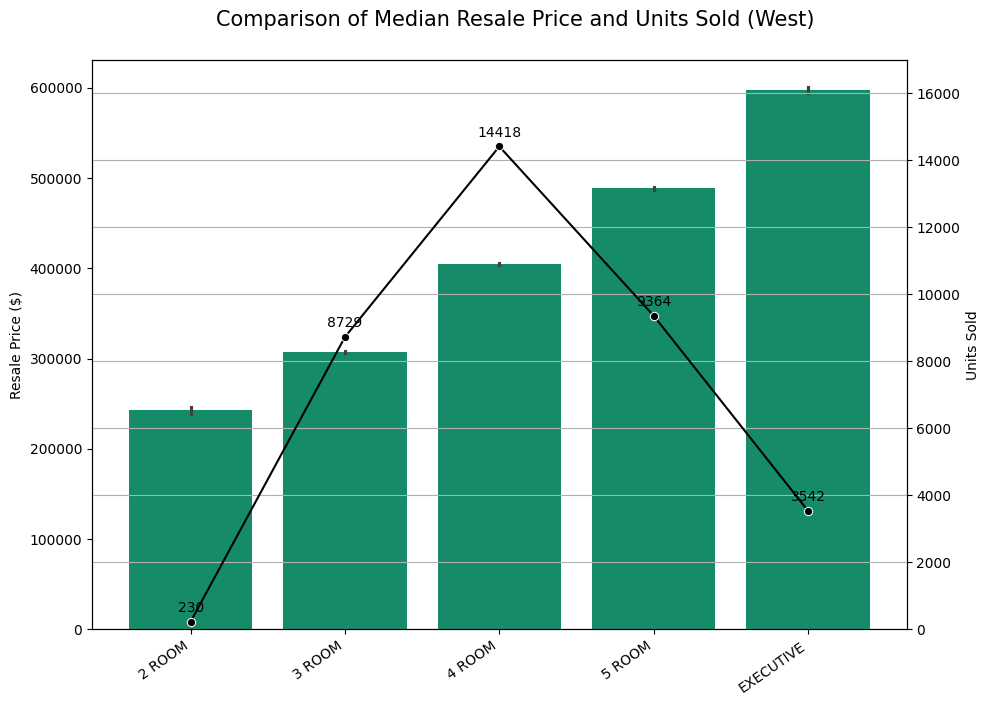

In [10]:
#### Filter by region

## West Region
west_region = hdb[hdb['region'] == 'West'] 
sorted_west_price= west_region.groupby(['flat_type', 'id'])['resale_price'].median().sort_values(ascending=False)
sorted_west_flat= west_region.groupby('flat_type')['id'].count().sort_values(ascending=False)
sorted_west_price = pd.DataFrame(sorted_west_price).reset_index()
sorted_west_flat = pd.DataFrame(sorted_west_flat).reset_index()


ordered_flat = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
# Creating subplots
fig, ax1 = plt.subplots(figsize=(10,7))

# plotting west region
ax1 = sns.barplot(data = sorted_west_price, x = 'flat_type', y = 'resale_price',  order = ordered_flat, color=colors[2])
ax1.set_xlabel('')
ax1.set_ylabel('Resale Price ($)')
ax1.set_xticklabels(rotation = 35, ha='right', labels = ordered_flat)


ax2 = ax1.twinx()

ax2 = sns.lineplot(data = sorted_west_flat, x = 'flat_type', y = 'id',  color='black', marker='o')
ax2.set_ylim(0, 17000)
ax2.set_ylabel('Units Sold')


# Annotating the points on the line plot with the count of flats
for x, y in zip(sorted_west_flat['flat_type'], sorted_west_flat['id']):
    ax2.annotate(f'{y}', (x, y), xytext=(0, 5), textcoords='offset points', color='black', ha='center', va='bottom')

# set additional parameters for the plot
plt.suptitle('Comparison of Median Resale Price and Units Sold (West)', fontsize = 15, y = 1.0, x = 0.52)

plt.grid()
plt.tight_layout()
plt.show()


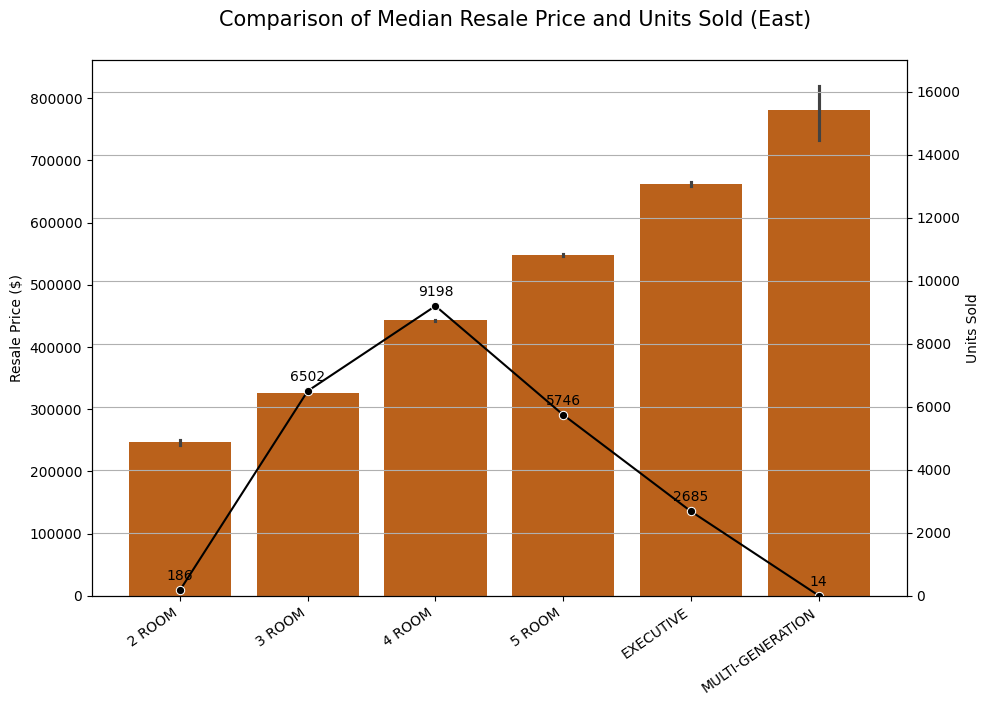

In [11]:
#### Filter by region

## East Region
east_region = hdb[hdb['region'] == 'East'] 
sorted_east_price= east_region.groupby(['flat_type', 'id'])['resale_price'].median().sort_values(ascending=False)
sorted_east_flat= east_region.groupby('flat_type')['id'].count().sort_values(ascending=False)
sorted_east_price = pd.DataFrame(sorted_east_price).reset_index()
sorted_east_flat = pd.DataFrame(sorted_east_flat).reset_index()


ordered_flat = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
# Creating subplots
fig, ax1 = plt.subplots(figsize=(10,7))

# plotting east region
ax1 = sns.barplot(data = sorted_east_price, x = 'flat_type', y = 'resale_price',  order = ordered_flat, color=colors[3])
ax1.set_xlabel('')
ax1.set_ylabel('Resale Price ($)')
ax1.set_xticklabels(rotation = 35, ha='right', labels = ordered_flat)


ax2 = ax1.twinx()

ax2 = sns.lineplot(data = sorted_east_flat, x = 'flat_type', y = 'id',  color='black', marker='o')
ax2.set_ylim(0, 17000)
ax2.set_ylabel('Units Sold')


# Annotating the points on the line plot with the count of flats
for x, y in zip(sorted_east_flat['flat_type'], sorted_east_flat['id']):
    ax2.annotate(f'{y}', (x, y), xytext=(0, 5), textcoords='offset points', color='black', ha='center', va='bottom')

# set additional parameters for the plot
plt.suptitle('Comparison of Median Resale Price and Units Sold (East)', fontsize = 15, y = 1.0, x = 0.52)

plt.grid()
plt.tight_layout()
plt.show()


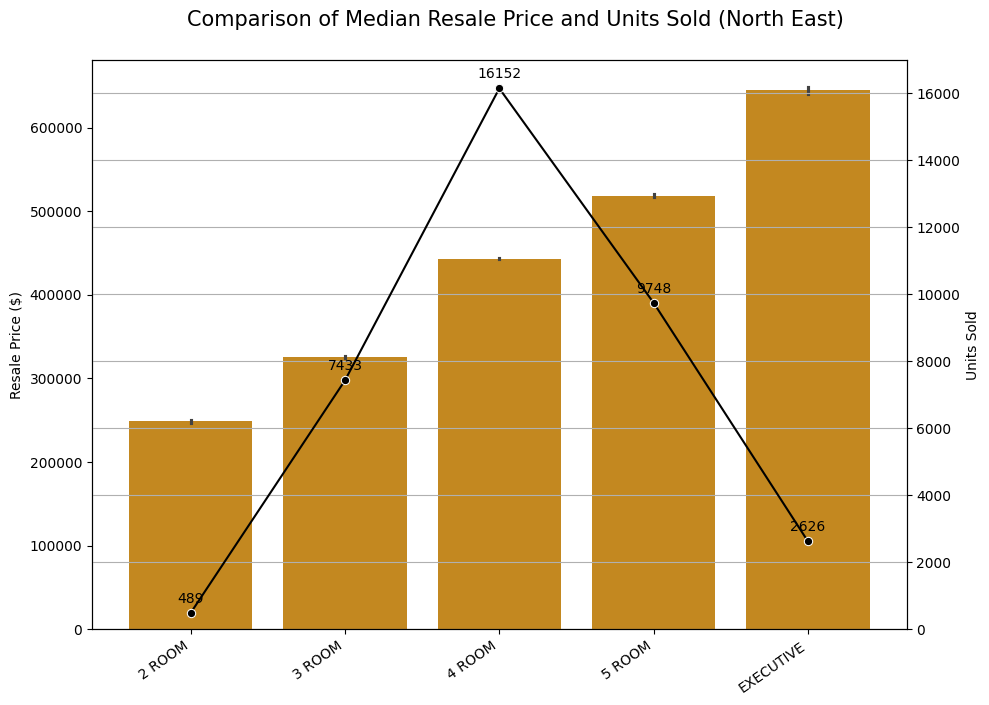

In [12]:
#### Filter by region

## North East Region
northeast_region = hdb[hdb['region'] == 'North East'] 
sorted_northeast_price= northeast_region.groupby(['flat_type', 'id'])['resale_price'].median().sort_values(ascending=False)
sorted_northeast_flat= northeast_region.groupby('flat_type')['id'].count().sort_values(ascending=False)
sorted_northeast_price = pd.DataFrame(sorted_northeast_price).reset_index()
sorted_northeast_flat = pd.DataFrame(sorted_northeast_flat).reset_index()


ordered_flat = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
# Creating subplots
fig, ax1 = plt.subplots(figsize=(10,7))

# plotting northeast region
ax1 = sns.barplot(data = sorted_northeast_price, x = 'flat_type', y = 'resale_price',  order = ordered_flat, color=colors[1])
ax1.set_xlabel('')
ax1.set_ylabel('Resale Price ($)')
ax1.set_xticklabels(rotation = 35, ha='right', labels = ordered_flat)


ax2 = ax1.twinx()

ax2 = sns.lineplot(data = sorted_northeast_flat, x = 'flat_type', y = 'id',  color='black', marker='o')
ax2.set_ylim(0, 17000)
ax2.set_ylabel('Units Sold')


# Annotating the points on the line plot with the count of flats
for x, y in zip(sorted_northeast_flat['flat_type'], sorted_northeast_flat['id']):
    ax2.annotate(f'{y}', (x, y), xytext=(0, 5), textcoords='offset points', color='black', ha='center', va='bottom')

# set additional parameters for the plot
plt.suptitle('Comparison of Median Resale Price and Units Sold (North East)', fontsize = 15, y = 1.0, x = 0.52)

plt.grid()
plt.tight_layout()
plt.show()


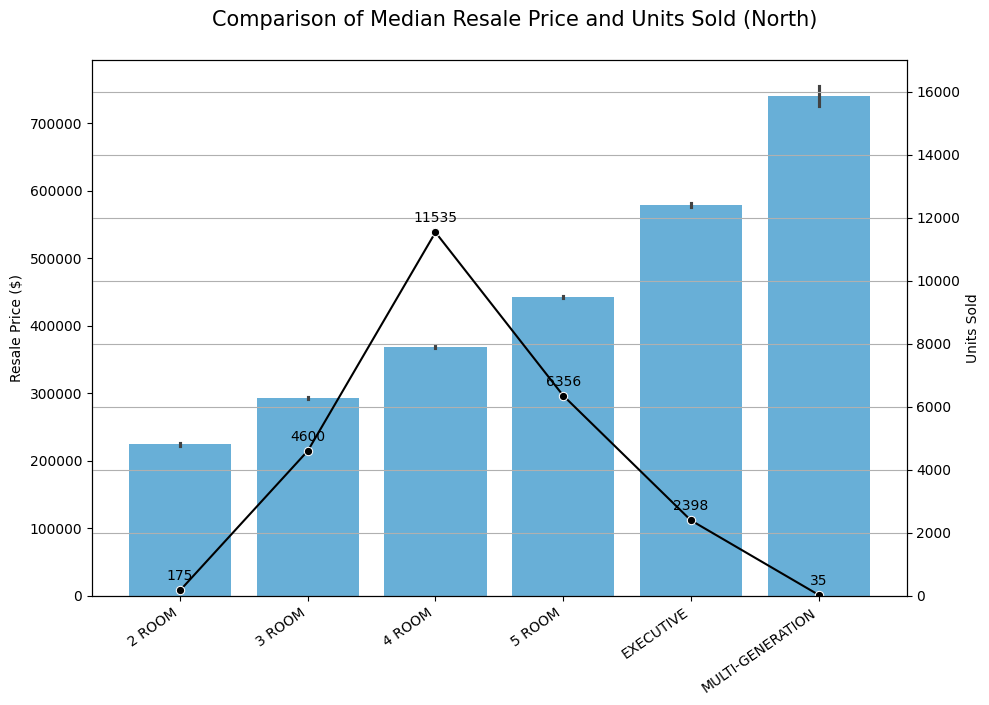

In [13]:
#### Filter by region

## North Region
north_region = hdb[hdb['region'] == 'North'] 
sorted_north_price= north_region.groupby(['flat_type', 'id'])['resale_price'].median().sort_values(ascending=False)
sorted_north_flat= north_region.groupby('flat_type')['id'].count().sort_values(ascending=False)
sorted_north_price = pd.DataFrame(sorted_north_price).reset_index()
sorted_north_flat = pd.DataFrame(sorted_north_flat).reset_index()


ordered_flat = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
# Creating subplots
fig, ax1 = plt.subplots(figsize=(10,7))

# plotting north region
ax1 = sns.barplot(data = sorted_north_price, x = 'flat_type', y = 'resale_price',  order = ordered_flat, color=colors[9])
ax1.set_xlabel('')
ax1.set_ylabel('Resale Price ($)')
ax1.set_xticklabels(rotation = 35, ha='right', labels = ordered_flat)


ax2 = ax1.twinx()

ax2 = sns.lineplot(data = sorted_north_flat, x = 'flat_type', y = 'id',  color='black', marker='o')
ax2.set_ylim(0, 17000)
ax2.set_ylabel('Units Sold')


# Annotating the points on the line plot with the count of flats
for x, y in zip(sorted_north_flat['flat_type'], sorted_north_flat['id']):
    ax2.annotate(f'{y}', (x, y), xytext=(0, 5), textcoords='offset points', color='black', ha='center', va='bottom')

# set additional parameters for the plot
plt.suptitle('Comparison of Median Resale Price and Units Sold (North)', fontsize = 15, y = 1.0, x = 0.52)

plt.grid()
plt.tight_layout()
plt.show()


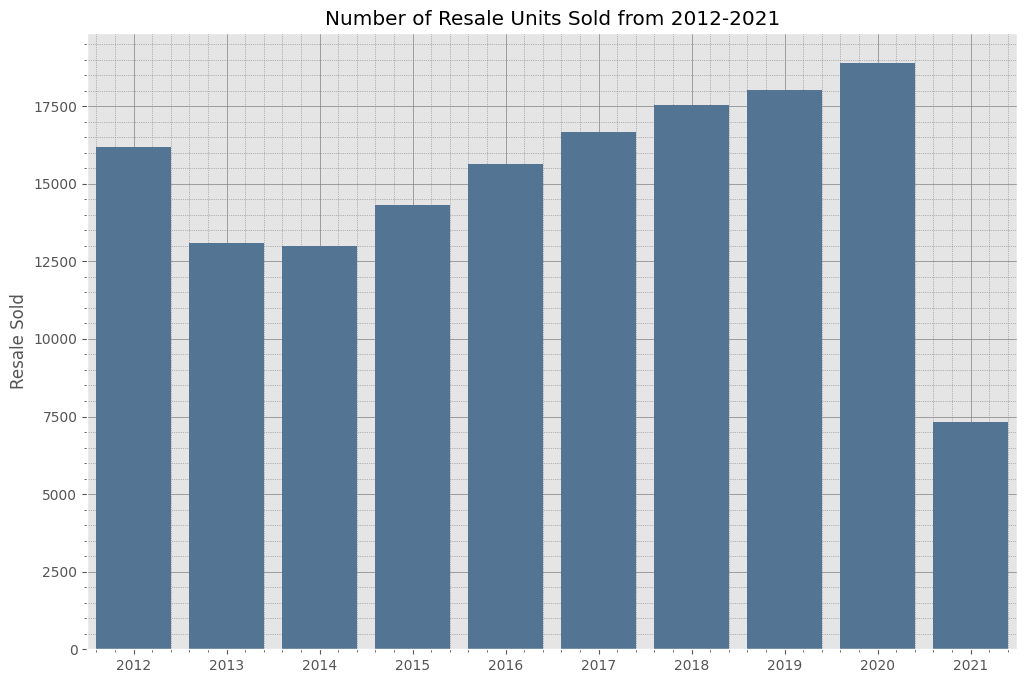

In [14]:
# plot the number of flats sold over the years

flats_sold_years = hdb.groupby(['tranc_year'])['id'].count()

plt.style.use('ggplot')  # Apply a style

fig, ax = plt.subplots(figsize=(12,8))


sns.barplot(x = flats_sold_years.index, y = flats_sold_years.values, color = '#49759c')

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Resale Sold')
plt.title('Number of Resale Units Sold from 2012-2021')

plt.show()

## Boxplot

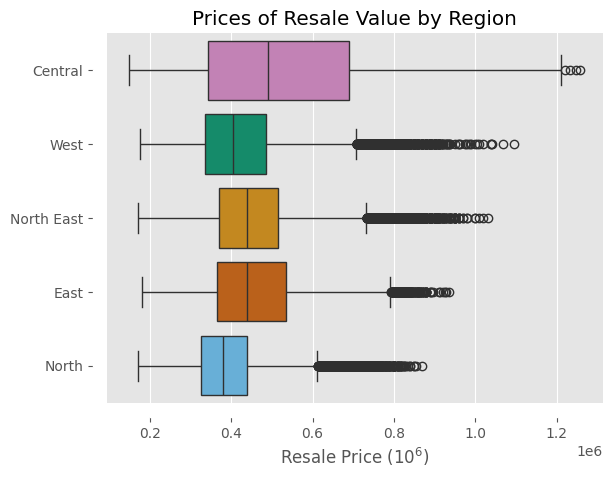

In [15]:
# Boxplot of resale prices in different regions

# set a plot order
ordered_list = ['Central', 'West', 'North East', 'East', 'North']

# plot the graph
sns.boxplot(y = 'region', x = 'resale_price', data = hdb, orient = 'h', hue = 'region', palette=custom_palette, order = ordered_list)

# insert plot info
plt.xlabel('Resale Price ($10^6$)')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Prices of Resale Value by Region')


sns.despine(offset=10, trim=True)

plt.show()

As expected, Central region has the highest median resale value **and** the highest variability, with a few units sold for at least 1.2 million dollars. While the North region having the lowest variabilty and the lowest median price. 

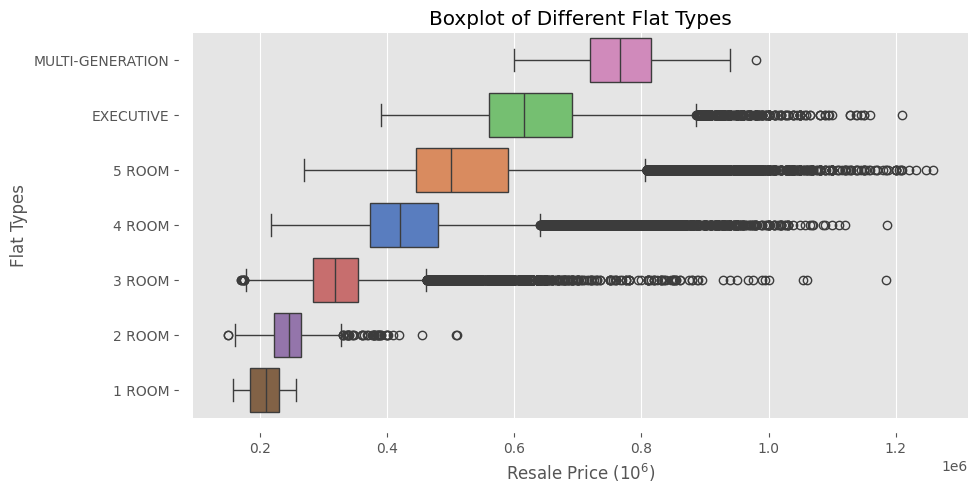

In [16]:
flat_ordered = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

plt.figure(figsize=(10,5))

sns.boxplot(data = hdb, x = 'resale_price', y = 'flat_type', order=flat_ordered[::-1], hue = 'flat_type', palette='muted')

plt.title('Boxplot of Different Flat Types')
plt.xlabel('Resale Price ($10^6$)')
plt.ylabel('Flat Types')

sns.despine(offset=10, trim=True)

plt.show()

The boxplot shows the expected increase in resale price with bigger rooms. The flat types that crossed 1 million dollars in value are the 3 rooms, 4 rooms, 5 rooms, and executive units. Interestingly, 3 room flats surpassed 1 million dollars and have outliers on both sides of the plot.

In [17]:
# Consolidate the mrt data for plotting
# We will be creating a new value that inputs the mrt line for each resale flat, double or triple if it is an interchange with 2 or 3 intersecting lines

north_south_line=['Jurong East','Bukit Batok','Bukit Gombak','Choa Chu Kang','Yew Tee','Kranji','Marsiling','Woodlands','Admiralty','Sembawang','Canberra','Yishun','Khatib','Yio Chu Kang','Ang Mo Kio','Bishan','Braddell','Toa Payoh','Novena','Newton','Orchard','Somerset','Dhoby Ghaut','City Hall','Raffles Place','Marina Bay','Marina South Pier']
north_south_line = [mrt.lower() for mrt in north_south_line]
north_south_line = [mrt.strip() for mrt in north_south_line]
#print(north_south_line) # debug

north_east_line = ['HarbourFront','Outram Park','Chinatown','Clarke Quay','Little India','Farrer Park','Boon Keng','Potong Pasir','Woodleigh','Serangoon','Kovan','Hougang','Buangkok','Hougang','Sengkang','Punggol']
north_east_line = [mrt.lower() for mrt in north_east_line]
north_east_line = [mrt.strip() for mrt in north_east_line]
#print(north_east_line)# debug

east_west_line = ['Tuas Link','Tuas West Road','Tuas Crescent','Gul Circle','Joo Koon','Pioneer','Boon Lay','Lakeside','Chinese Garden','Jurong East','Clementi','Dover','Buona Vista','Commonwealth','Queenstown','Redhill','Tiong Bahru','Outram Park','Tanjong Pagar','Shenton Way','Raffles Place','City Hall','Bugis','Lavender','Kallang','Aljunied','Paya Lebar','Eunos','Kembangan','Bedok','Tanah Merah','Simei','Tampines','Pasir Ris','Expo','Changi Airport']
east_west_line = [mrt.lower() for mrt in east_west_line]
east_west_line = [mrt.strip() for mrt in east_west_line]
#print(east_west_line)# debug

circle_line = ['HabourFront','Telok Blangah','Labrador Park','Pasir Panjang','Haw Par Villa','Kent Ridge','one-north','Bouna Vista','Holland Village','Farrer Road','Botanic Gardens','Caldecott','Marymount','Bishan','Lorong Chuan','Serangoon','Bartley','Tai Seng','MacPerson','Paya Lebar','Dakota','Mountbatten','Stadium','Nicoll Highway','Promenade','Esplanade','Bras Basah','Dhoby Ghaut']
circle_line = [mrt.lower() for mrt in circle_line]
circle_line = [mrt.strip() for mrt in circle_line]
#print(circle_line)# debug

down_town_line = ['Bukit Panjang','Cashew','Hillview','Beauty World','King Albert Park','Sixth Avenue','Tan Kah Kee','Botanic Gardens','Stevens','Newton','Little India','Rochor','Promenade','Bayfront','Downtown','Telok Ayer','Chinatown','Fort Canning','Bencoolen','Jalan Besar','Bendemeer','Geylang Bahru','Mattar','MacPherson','Ubi','Kaki Bukit','Bedok North','Bedok Reservoir','Tampines West','Tampines','Tampines East','Upper Changi','Changi Airport']
down_town_line = [mrt.lower() for mrt in down_town_line]
down_town_line = [mrt.strip() for mrt in down_town_line]
#print(down_town_line)# debug

thomson_east_coast_line =['Woodlands North','Woodlands','Woodlands South','Springleaf','Lentor','Mayflower','Bright Hill','Upper Thomson','Caldecott','Stevens','Napier','Orchard Boulevard','Orchard','Great World','Havelock','Outram Park','Maxwell','Shenton Way','Marina Bay','Gardens by the Bay']
thomson_east_coast_line = [mrt.lower() for mrt in thomson_east_coast_line]
thomson_east_coast_line = [mrt.strip() for mrt in thomson_east_coast_line]
#print(thomson_east_coast_line)# debug

mrts = {"North South Line":north_south_line, 'North East line':north_east_line,'East West Line' :east_west_line,'Circle Line':circle_line,'Down Town Line': down_town_line,'Thomson East Coast Line':thomson_east_coast_line}
hdb['mrt_name'] = hdb['mrt_name'].apply(lambda x: x.lower())
hdb['mrt_name'] = hdb['mrt_name'].apply(lambda x: x.strip())

def mrt_counter(row):
    station_counter = 0
    name_list = []
    for name,station in mrts.items():
        if row in station:
            station_counter+=1
            name_list.append(name)
    if station_counter == 3:
        return 'Triple'
    elif station_counter == 2:
        return 'Double'
    else:
        return str(*name_list)

hdb['mrt_line'] = hdb['mrt_name'].apply(mrt_counter)

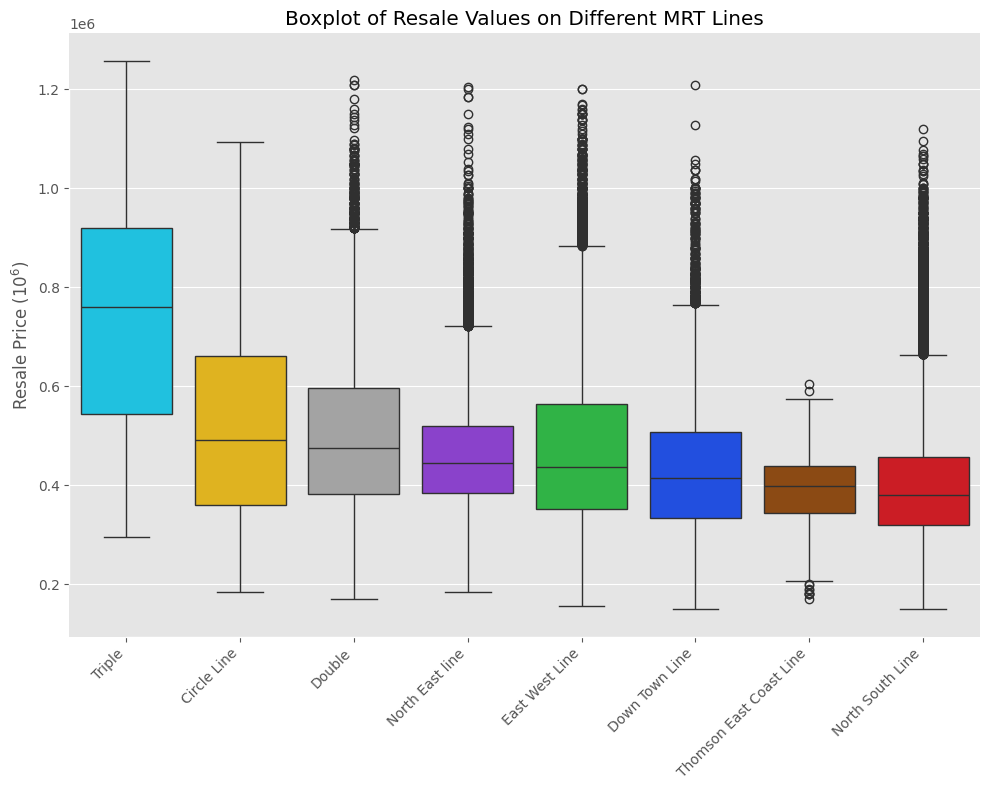

In [18]:
# plotting a boxplot for the mrt lines vs resale price

# using groupby to obtain the list in a decreasing order
median_resale_mrt = hdb.groupby('mrt_line')['resale_price'].median().sort_values(ascending=False)
ordered_mrt = median_resale_mrt.index.tolist()

# import custom palette
colors_bright = sns.color_palette("bright") 
#sns.palplot(colors_bright) # inspect colors_bright

# Assign colors
custom_palette_mrt = {'North South Line': colors_bright[3],
                  'North East line': colors_bright[4],
                  'East West Line': colors_bright[2],
                  'Circle Line': colors_bright[8],
                  'Down Town Line': colors_bright[0],
                  'Thomson East Coast Line': colors_bright[5],
                  'Triple': colors_bright[9],
                  'Double': colors_bright[7]}

# set figure size
plt.figure(figsize=(10,8))

# plot the boxplot
sns.boxplot(data = hdb, x = 'mrt_line', y = 'resale_price', hue = 'mrt_line',  palette= custom_palette_mrt, order=ordered_mrt)

# include plot details
plt.title('Boxplot of Resale Values on Different MRT Lines')
plt.ylabel('Resale Price ($10^6$)')
plt.xlabel('')
plt.xticks(rotation = 45, ha = 'right')

sns.despine(trim=True)

plt.tight_layout()
plt.show()

# Histogram

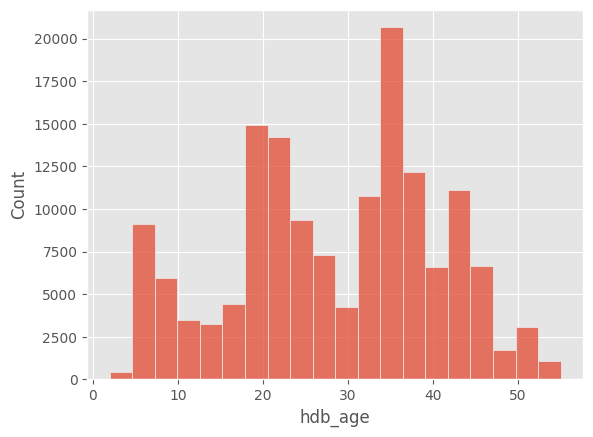

In [19]:
sns.histplot(data = hdb, x= 'hdb_age', bins = 20)

plt.show()

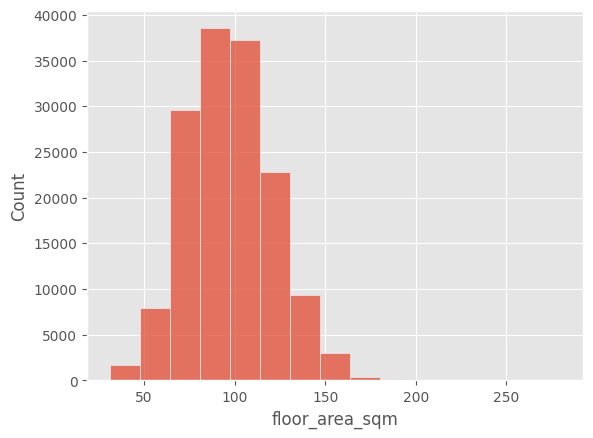

In [20]:
sns.histplot(data = hdb, x= 'floor_area_sqm', bins = 15)

plt.show()

# Line plot

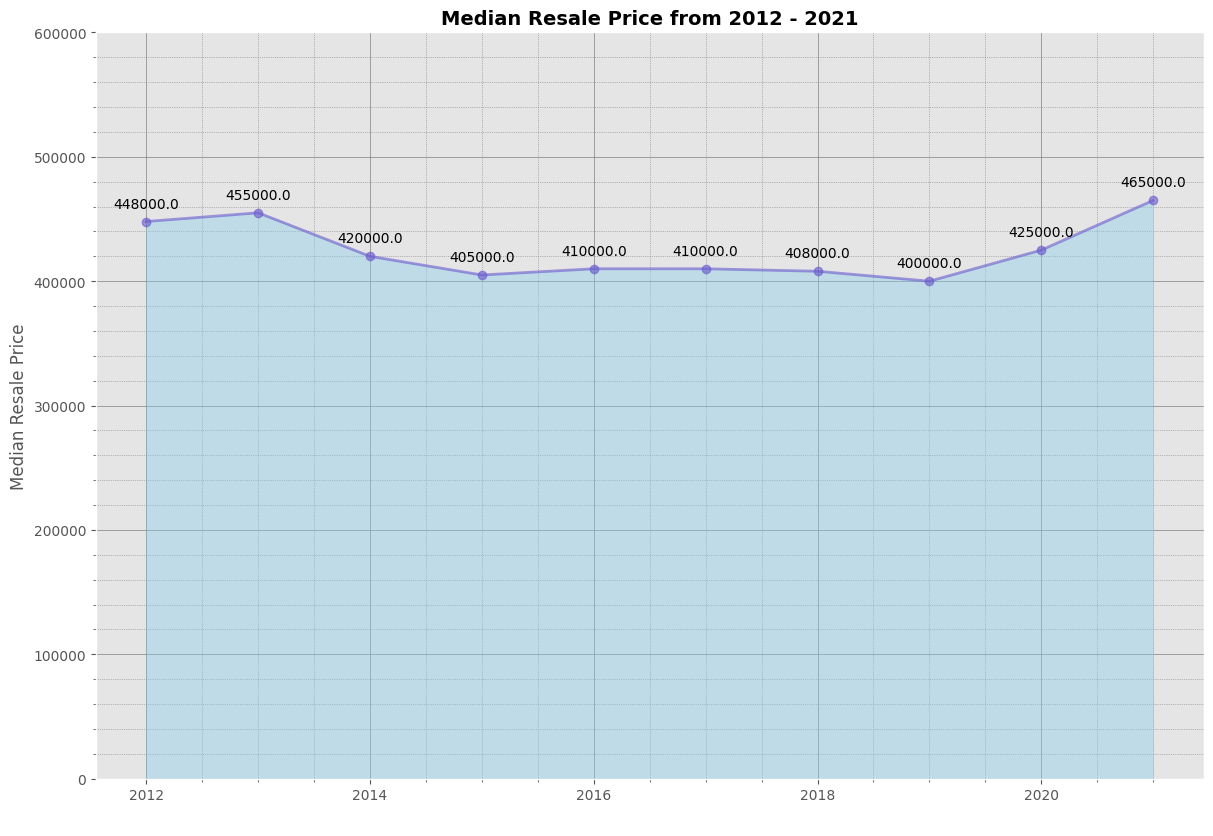

In [21]:
median_resale = hdb.groupby('tranc_year')['resale_price'].median().sort_index()

years = []
median_values = []

for year, median_value in median_resale.items():
    years.append(year)
    median_values.append(median_value)
    #print(year, median_value) #debug
plt.style.use('ggplot')  # Apply a style

fig, ax = plt.subplots(figsize=(12,8))


# Plotting with customizations
ax.fill_between(years, median_values, color='skyblue', alpha=0.4)
ax.plot(years, median_values, color='Slateblue', alpha=0.6, linewidth=2, marker='o')

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Annotations for significant points
for i, txt in enumerate(median_values):
    ax.annotate(txt, (years[i], median_values[i]), textcoords='offset points', xytext=(0,10), ha='center')

# Improve the layout
plt.tight_layout()

# Increase title and label font sizes
ax.set_title('Median Resale Price from 2012 - 2021', fontsize=14, weight='bold')
ax.set_xlabel(' ')
ax.set_ylabel('Median Resale Price', fontsize=12)
ax.set_ylim(0,600000)

# Save the figure with high quality
#plt.savefig('/mnt/data/plot_enhanced.png', dpi=300)

plt.show()


In [22]:
hdb_amenities = hdb[['tranc_year', 'resale_price', 'mall_within_2km', 'hawker_within_2km', 'nearby_top_sch', 'planning_area']]
print(hdb_amenities.head())

   tranc_year  resale_price  mall_within_2km  hawker_within_2km  nearby_top_sch planning_area
0        2016      680000.0                7                 13               0       Kallang
1        2012      665000.0                3                  7               0        Bishan
2        2013      838000.0                4                  1               0   Bukit Batok
3        2012      550000.0                4                  9               1        Bishan
4        2017      298000.0                2                  1               0        Yishun


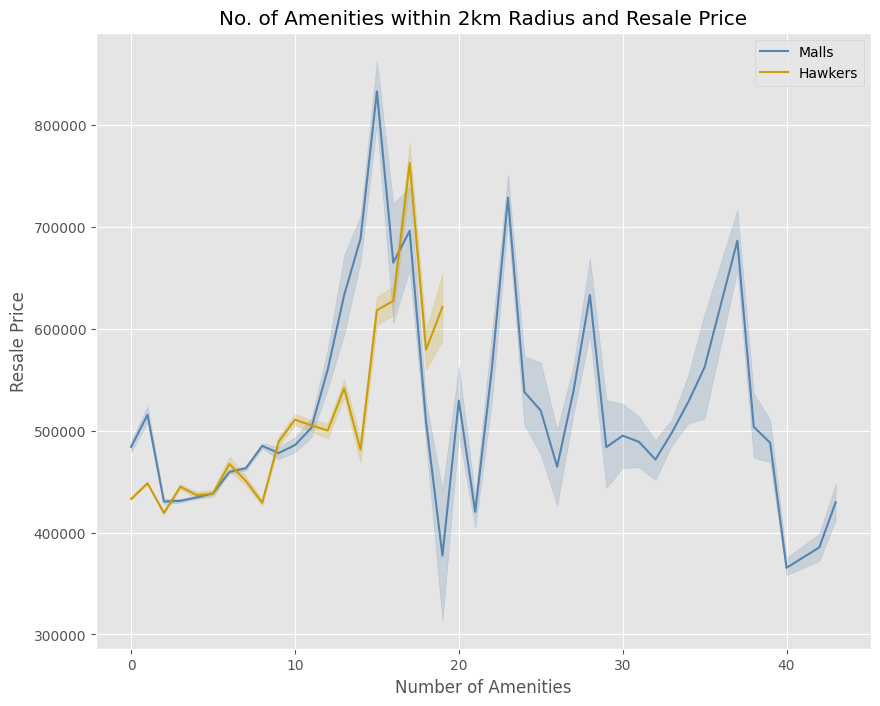

In [23]:
plt.figure(figsize =(10,8))
sns.lineplot(data = hdb_amenities, x = 'mall_within_2km', y = 'resale_price', color = '#5684ae' , label = 'Malls')
sns.lineplot(data = hdb_amenities, x = 'hawker_within_2km', y = 'resale_price', color = '#cb9d06' , label = 'Hawkers')

plt.title('No. of Amenities within 2km Radius and Resale Price')
plt.xlabel('Number of Amenities')
plt.ylabel('Resale Price')


plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

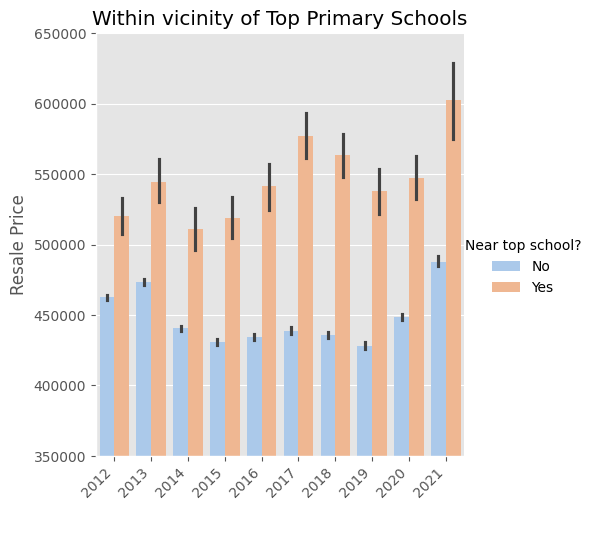

In [24]:

plt.figure(figsize =(12,8))
ax = sns.catplot(data = hdb_amenities, kind= 'bar', x = 'tranc_year', y = 'resale_price', hue =  'nearby_top_sch', palette='pastel')


plt.title('Within vicinity of Top Primary Schools')
plt.xlabel(' ')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Resale Price')
plt.ylim(350000, 650000)

# plt.legend(title='Near top school?' ,labels=['Yes','No'])

ax._legend.set_title('Near top school?')

new_labels = ['No','Yes']
for t,l in zip(ax._legend.texts,new_labels):
    t.set_text(l)
plt.show()

## Scatterplot 

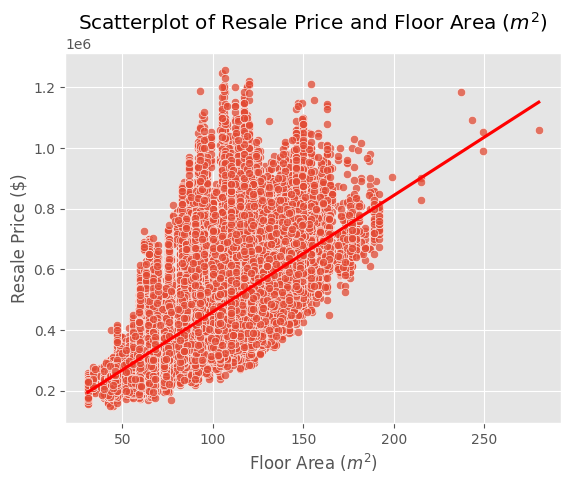

In [25]:
# Scatter plot of resale price vs price_per_sqm

sns.scatterplot(data = hdb, x = 'floor_area_sqm', y = 'resale_price', alpha = 0.75)
sns.regplot(data=hdb, x = 'floor_area_sqm', y = 'resale_price', scatter= False, color= 'red')

plt.title('Scatterplot of Resale Price and Floor Area ($m^2$)')
plt.xlabel('Floor Area ($m^2$)')
plt.ylabel('Resale Price ($)')
plt.show()

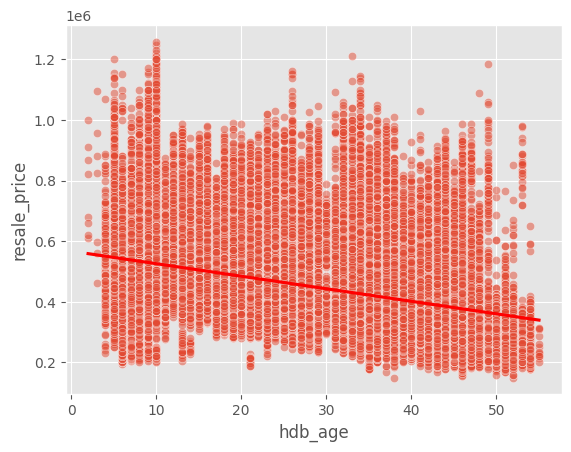

                                 OLS Regression Results                                
Dep. Variable:           resale_price   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                          3.471e+05
Date:                Thu, 14 Mar 2024   Prob (F-statistic):                        0.00
Time:                        12:30:07   Log-Likelihood:                     -2.0915e+06
No. Observations:              150634   AIC:                                  4.183e+06
Df Residuals:                  150633   BIC:                                  4.183e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
# Scatterplot of resale price vs hdb_age
from scipy.stats import pearsonr
import statsmodels.api as sm


sns.scatterplot(data=hdb, x= 'hdb_age', y='resale_price', alpha = 0.5)
sns.regplot(data=hdb, x= 'hdb_age', y='resale_price', scatter=False, color='red')


plt.show()

X = sm.add_constant(hdb['hdb_age'])
model = sm.OLS(hdb['resale_price'], hdb['hdb_age']).fit()
r_squared = model.rsquared
print(model.summary())
print('R2: ', r_squared)

correlation, _ = pearsonr(hdb['hdb_age'], hdb['resale_price'])

print('Correlation Coefficient: ', correlation)

# Pairplot

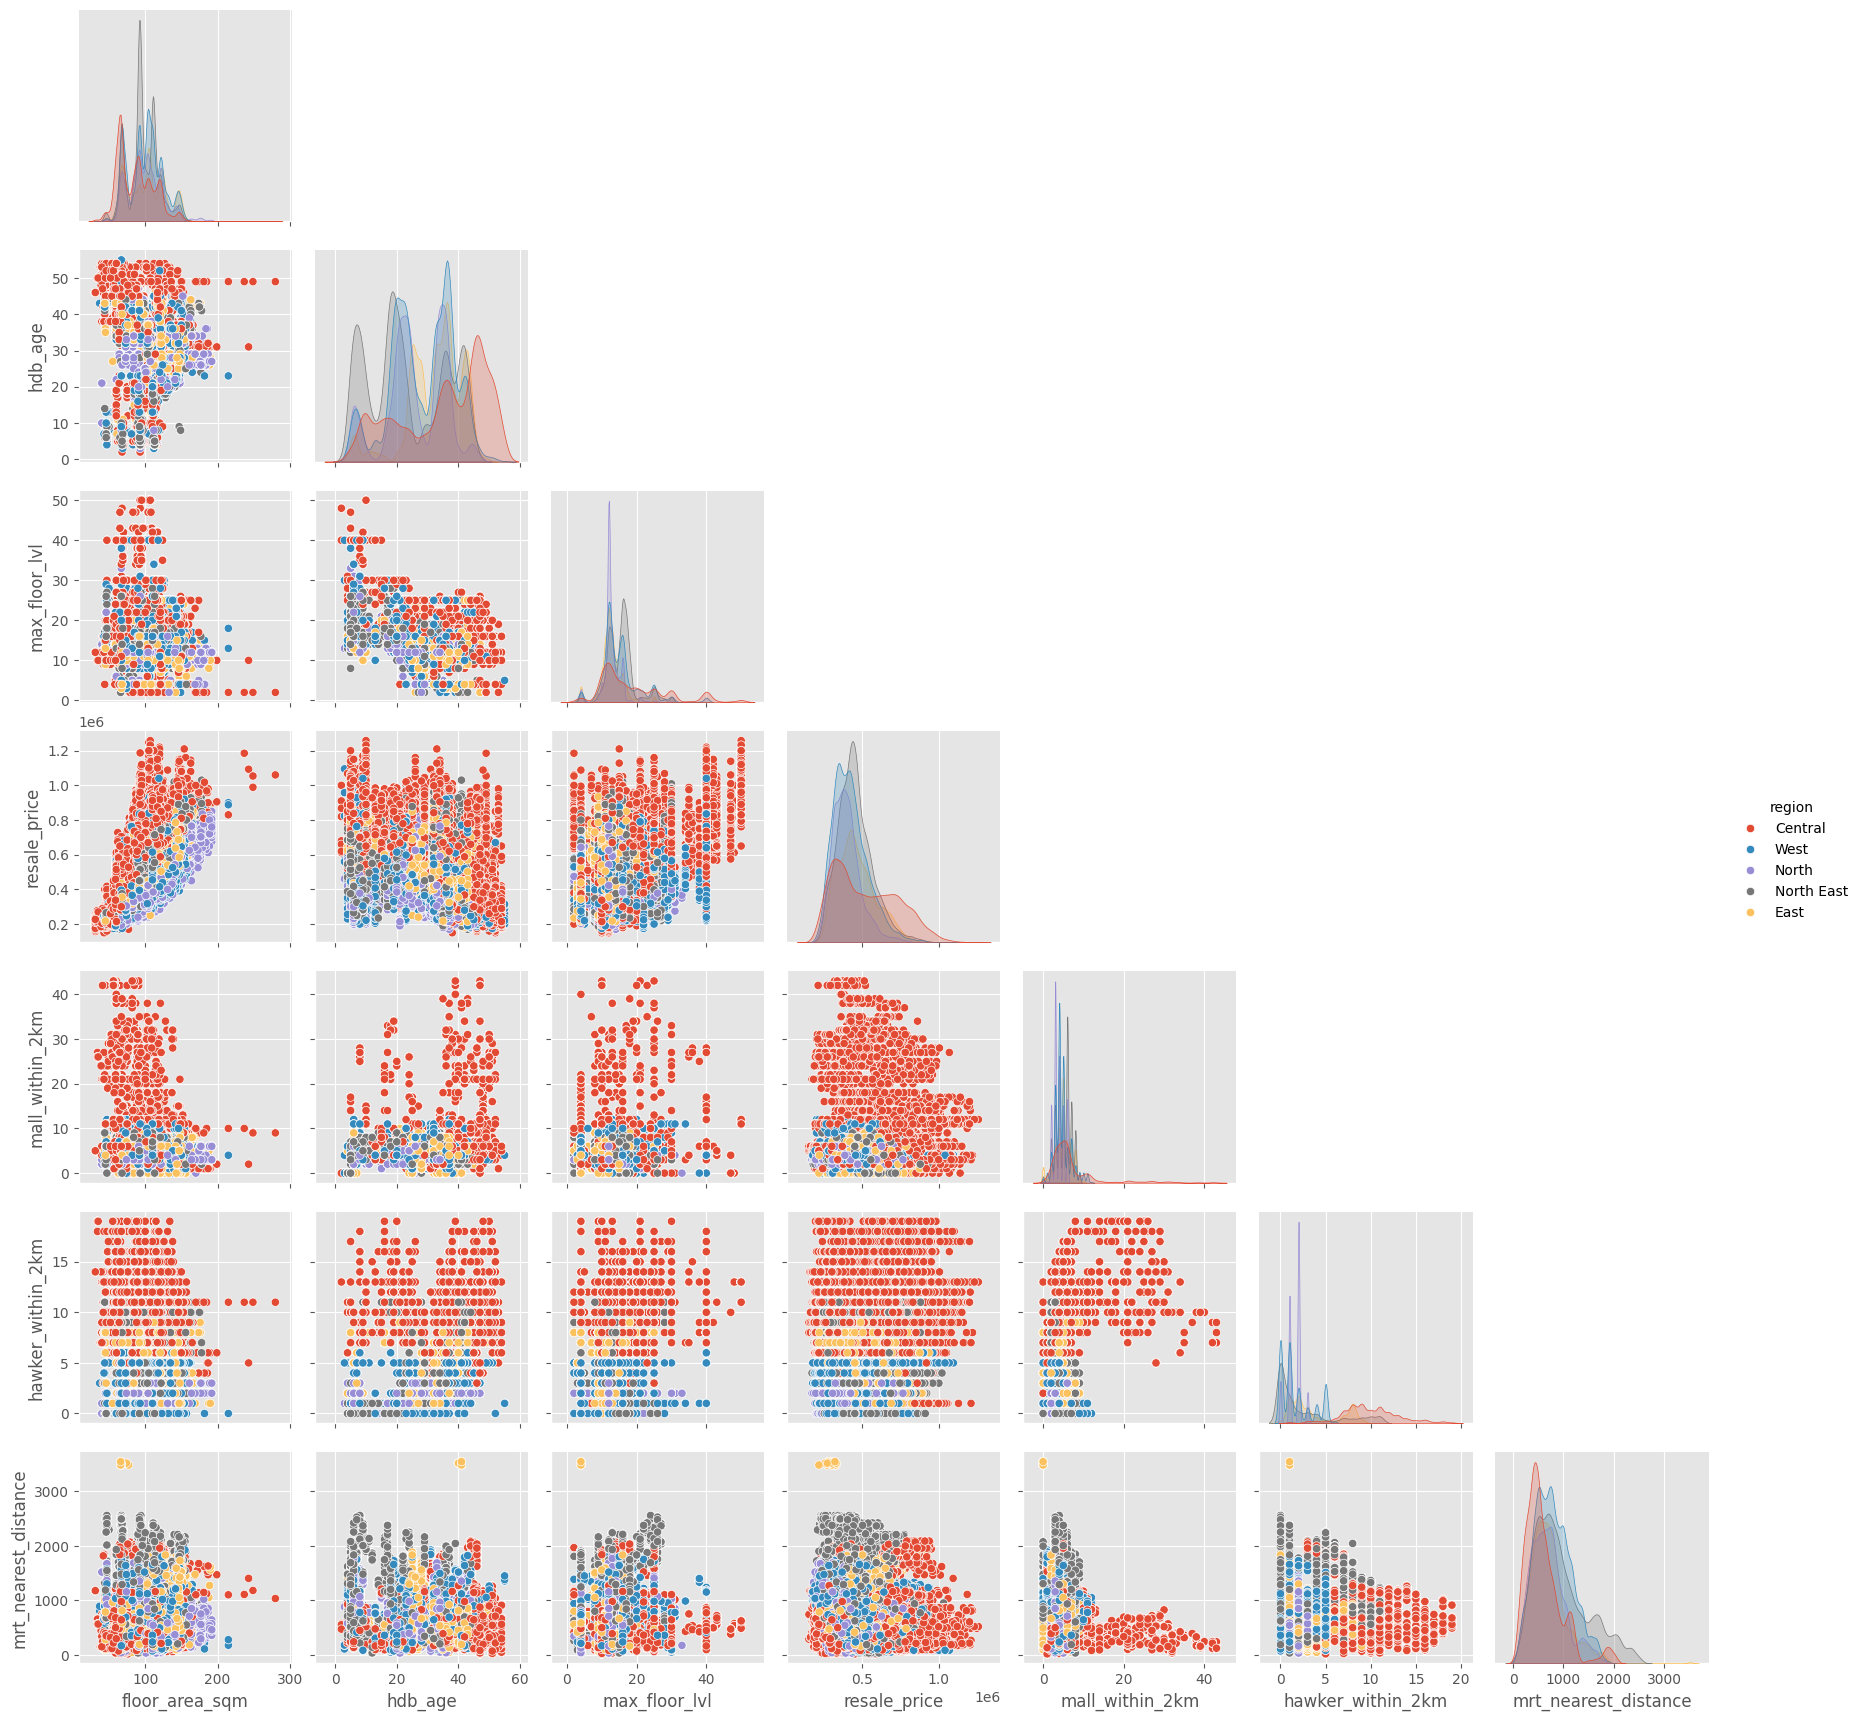

In [27]:
features = ['floor_area_sqm', 'hdb_age', 'max_floor_lvl', 'resale_price', 'mall_within_2km', 'hawker_within_2km', 'mrt_nearest_distance']

sns.pairplot(hdb, vars=features, hue='region', corner = True)

plt.show()